In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

## Описание задачи:

- ссылка на данные: https://www.kaggle.com/competitions/big-data-derby-2022/overview


### Задача:

Необходимо провести анализ тактики скачек, составление стратегии и эффективность пути.

Работа поможет владельцам скаковых лошадей, тренерам и ветеринарам лучше понять, как сочетаются производительность и благополучие лошадей. При лучшем анализе данных благосостояние лошадей может значительно улучшиться.


Используя данные, можно анализировать принятие решений жокеями, сравнивать поверхности гонок и лучше прогнозировать кто победит.


### Табличные данные:

- nyra_start_table.csv - данные о гонках лошадей/жокеев;
- nyra_race_table.csv - данные о гонках на гоночных трассах;
- nyra_tracking_table.csv - данные отслеживания;
- nyra_2019_complete.csv - объединенная таблица из трех вышеуказанных файлов.

## Описание данных:

Я использовала сразу объединенную таблицу - nyra_2019_complete.csv.
Поэтому будет описание сразу всех столбцов.

* track_id - Трехсимвольный идентификатор трассы, на которой проходила гонка. AQU – Акведук, BEL – Белмонт, SAR – Саратога. 
* race_date - дата проведения гонки. ГГГГ-ММ-ДД.
* race_number - Номер гонки. Передается как 3 символа, но для этого набора данных его можно привести или преобразовать в int.
* program_number - Программный номер лошади в скачках передается как 3 символа. Должно оставаться 3 символа, так как это не ограничивается только цифрами. По сути, это уникальный идентификатор лошади в гонке.
* trakus_index - Общий набор точек широты/долготы лошади в скачках проходил как целое число. Насколько мы можем судить, он собирается каждые 0,25 секунды.
* latitude - Широта лошади в гонке.
* longitude - Долгота лошади в гонке.
* distance_id - Дистанция гонки в фарлонгах передается как целое число. Пример - 600 будет 6 фарлонгов.
* course_type - Трасса, по которой проходила гонка, передается как один символ. M - барьер, D - грязь, O - внешний газон, I - внутренний газон, T - газон.
* track_condition - Состояние трассы, на которой проходила гонка, соответствовало трем символам. YL - Уступчивый, FM - Жесткий, SY - Неаккуратный, GD - Хороший, FT - Быстрый, MY - Грязный, SF - Тихий.
* run_up_distance - Расстояние в футах от ворот до начала гонки, передается как целое число.
* race_type - Классификация гонки, передается как пять символов:
    - STK — скачки с наибольшим призовым фондом, в которых принимают участие самые лучшие лошади. 
    - WCL — заявочная гонка, в которой одному или нескольким участникам разрешается участвовать в гонке без возможности быть заявленными после длительного перерыва, и они участвуют в заявочной гонке, заявочная цена которой равна или превышает их последний старт в заявочной гонке. 
    - WMC — Заявочная гонка для не победителей, в которой одному или нескольким участникам разрешается участвовать в гонке без возможности быть заявленными после длительного перерыва, и они участвуют в заявочной гонке, заявочная цена которой равна или превышает их последний старт в заявочной гонке.
    - SST — В этом забеге по ставкам участвуют только лошади, которые стартовали за определенную заявленную цену или меньше в течение определенного периода времени. 
    - SHP — Эта категория зарезервирована для лошадей, которые выступали в низшей заявочной компании, но улучшились до такой степени, что они не рискуют быть проданными в заявочной гонке. По сути, этот забег является забегом, допускаемым только к лошадям, которые ранее участвовали в заявочном забеге на определенном уровне (например, стартеры по заявочной цене в 5000 долларов). В стартовой гонке с гандикапом лошади взвешиваются так же, как и в гонке с гандикапом. (Гандикап  — в многоэтапных спортивных соревнованиях — способ отражения лидерства на предыдущих этапах в более раннем выпуске на старт в последующих. А также, способ уравнивания возможностей слабых участников соревнования с более сильными путём предоставления им некоего преимущества.)
    - CLM — Забеги претендентов - это наиболее часто проводимые забеги в стране. Лошади, участвующие в заявочных забегах, предлагаются для продажи по определенной цене подходящим покупателям.
    - STR — Стартовые заезды с надбавкой идентичны стартовым заездам с гандикапом, с той лишь разницей, что лошади, участвующие в этом заезде, взвешиваются с учетом условий надбавки (т.е. количества заездов или выигранных денег).
    - AOC — Этот тип гонок сочетает в себе черты, присущие двум традиционным типам гонок - гоночным и заявочным. Лошади могут быть заявлены на условиях допуска (не имеют права быть заявленными, но должны соответствовать условиям гонки) или заявлены по заявленной цене, если они не соответствуют условиям гонки., 
    - SOC — Этот тип гонок представляет собой еще один гибрид двух типов гонок: Стартового пособия и Заявочного. Чтобы участвовать в забеге в качестве “разрешенной лошади” (не подлежащей заявке), лошадь должна стартовать за указанную заявленную цену или меньше в установленные сроки. Лошади, не подпадающие под условия Стартового пособия, могут участвовать в забеге, но они должны конкурировать за заявленную цену.
    - MCL — первые заявочные забеги предназначены для лошадей, которые никогда не выигрывали забег и имеют право быть заявленными.
    - ALW - скачки, для которых судья скачек разрабатывает определенные условия для определения веса, который необходимо перевозить, в зависимости от возраста, пола и / или прошлых результатов лошади. 
    - MSW - Первый Специальный Вес. Эти скачки предназначены для лошадей, которые никогда не выигрывали скачки. Они не имеют права быть востребованными. Термин "специальный вес" происходит от того факта, что произвольные веса присваиваются лошадям по возрасту. (например, 3-летние 118 фунтов, старше 122 фунтов).
* purse - Денежный фонд гонки в долларах США, передается с двумя знаками после запятой.
* post_time - Время суток, когда началась гонка, передается как 5 символов. Пример - 01220 будет 12:20.
* weight_carried - Целое число веса, которое несет лошадь в скачках.
* odds - Коэффициенты на победу в гонке передавались целым числом. Разделите на 100, чтобы получить коэффициент 1. Пример - 1280 будет 12,8-1.


## 1. Информация о данных

In [3]:
nyra_2019 = pd.read_csv('nyra_2019_complete.csv', low_memory=False)

In [4]:
nyra_2019.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090


In [5]:
nyra_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   track_id         object 
 1   race_date        object 
 2   race_number      int64  
 3   program_number   object 
 4   trakus_index     int64  
 5   latitude         float64
 6   longitude        float64
 7   distance_id      int64  
 8   course_type      object 
 9   track_condition  object 
 10  run_up_distance  int64  
 11  race_type        object 
 12  purse            int64  
 13  post_time        int64  
 14  weight_carried   int64  
 15  jockey           object 
 16  odds             int64  
dtypes: float64(2), int64(8), object(7)
memory usage: 678.1+ MB


In [6]:
# описание категориальных данных
nyra_2019.describe(include=['object'])

,track_id,race_date,program_number,course_type,track_condition,race_type,jockey
count,5228430,5228430,5228430,5228430,5228430,5228430,5228430
unique,3,217,20,5,7,12,178
top,AQU,2019-08-24,4,D,FT,CLM,Manuel Franco
freq,2158369,43925,611396,3229234,2345748,1142801,444024


По категориальным признакам можно сказать следующее:

- Самая популярная трасса AQU (Акведук);
- Всего было 217 гонок. Самая крупная гонка была 24 августа;
- Вего лошадей 20 уникальных номеров. Больше всех участвует в гонках номер 4;
- Самая популярная трасса - D (грязь);
- Самое популярное состояние трассы - FT (быстрая);
- Самый популярный забег - CLM (где можно купить лошадь);
- Жокеев всего 178 штук. Больше всех в забеге участвует Manuel Franco.

In [7]:
# описание числовых данных
nyra_2019.describe(include=['int', 'float'])

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,purse,post_time,weight_carried,odds
count,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06
mean,5.505409e+00,1.838652e+02,4.120387e+01,-7.377702e+01,7.563151e+02,6.791919e+01,8.887891e+04,4.204248e+02,1.207133e+02,1.482920e+03
std,2.860656e+00,1.183327e+02,9.771227e-01,4.711054e-02,1.796887e+02,3.892271e+01,1.278240e+05,2.802545e+02,4.351881e+00,1.952415e+03
min,1.000000e+00,1.000000e+00,4.066671e+01,-7.383260e+01,4.500000e+02,0.000000e+00,1.600000e+04,1.000000e+02,1.100000e+02,0.000000e+00
25%,3.000000e+00,8.800000e+01,4.067346e+01,-7.382883e+01,6.000000e+02,4.500000e+01,4.100000e+04,2.330000e+02,1.180000e+02,3.350000e+02
50%,6.000000e+00,1.760000e+02,4.071393e+01,-7.376915e+01,8.000000e+02,5.400000e+01,6.200000e+04,3.490000e+02,1.200000e+02,7.300000e+02
75%,8.000000e+00,2.640000e+02,4.071739e+01,-7.372564e+01,8.500000e+02,8.000000e+01,8.000000e+04,5.160000e+02,1.220000e+02,1.740000e+03
max,1.300000e+01,1.062000e+03,4.307399e+01,-7.371483e+01,2.000000e+03,2.800000e+02,1.500000e+06,1.259000e+03,1.600000e+02,1.910000e+04


Далее следует преобразовать некоторые признаки:

In [8]:
# weight_carried лучше перевести из футов в кг
nyra_2019['weight_carried'] = nyra_2019['weight_carried']*0.45

# odds - целевая переменная. надо ее /100, как указано в задании
nyra_2019['odds_new'] = nyra_2019['odds']/100

# перевод дистанции distance_id в км
# /100 - получаем фарлонги. * 0.2 - это уже перевод в км
nyra_2019['distance_id'] = nyra_2019['distance_id'] * 0.2/100

# выражаем в метрах. тк должно быть целое число
nyra_2019['run_up_distance'] = round(nyra_2019['run_up_distance'] * 0.3)

# следует преобразовать дату
# перевод в формат datetime64[ns]
nyra_2019['race_date'] = nyra_2019['race_date'].astype('datetime64[ns]')
# год 
nyra_2019['year'] = nyra_2019['race_date'].dt.year
# месяц
nyra_2019['month'] = nyra_2019['race_date'].dt.month
# день
nyra_2019['day'] = nyra_2019['race_date'].dt.day
# день недели
nyra_2019['day_of_week'] = pd.to_datetime(nyra_2019['race_date']).dt.dayofweek

В итоге имеем следующую информацию о датасете

In [9]:
nyra_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 22 columns):
 #   Column           Dtype         
---  ------           -----         
 0   track_id         object        
 1   race_date        datetime64[ns]
 2   race_number      int64         
 3   program_number   object        
 4   trakus_index     int64         
 5   latitude         float64       
 6   longitude        float64       
 7   distance_id      float64       
 8   course_type      object        
 9   track_condition  object        
 10  run_up_distance  float64       
 11  race_type        object        
 12  purse            int64         
 13  post_time        int64         
 14  weight_carried   float64       
 15  jockey           object        
 16  odds             int64         
 17  odds_new         float64       
 18  year             int64         
 19  month            int64         
 20  day              int64         
 21  day_of_week      int64         

Можно удалить признак "race_date", так как этот столбец преобразован в признаки "year", "month", "day", "day_of_week"

In [10]:
nyra_2019.drop(columns='race_date', axis=1, inplace=True)

## 2. EDA-анализ

### 2.1 Анализ признака "odds_new".

Данный признак имеет различные показатели. Стоит посмотреть на его распределение.

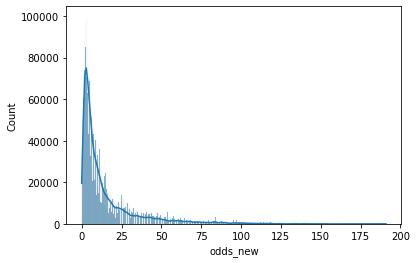

In [11]:
sns.histplot(nyra_2019['odds_new'], kde=True);

Следует проверить нормальное ли распределение (по критерию Шапиро-Уилка)

In [12]:
test_shapiro = stats.shapiro(nyra_2019['odds_new'])

print(test_shapiro)
if test_shapiro.pvalue < 0.05:
    print('Распределение ненормальное')
else:
    print('Распределение нормальное')

ShapiroResult(statistic=0.6795557141304016, pvalue=0.0)
Распределение ненормальное


/Users/sofiabelanova/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Так как распределение ненормальное, то odds_new надо пролагорифмировать

In [13]:
nyra_2019['odds_log'] = np.log(nyra_2019['odds_new'] + 1)

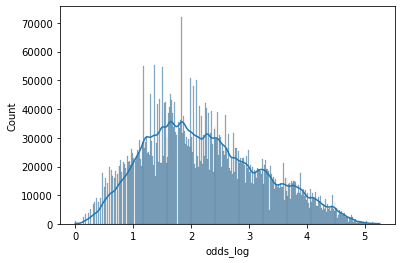

In [14]:
# распределение пролагорифмированной целевой переменной
sns.histplot(nyra_2019['odds_log'], kde=True);

#### Вывод: 
Можно сказать, что odds_new (odds_log) является целевой переменной для данного датасета. Так как это коэффициент на победу в гонке. И чем он лучше составлен, тем более понятны шансы на победу.

Далее следует понять какие коэффициенты вообще лучше и на какие больше приходится денежного фонда.

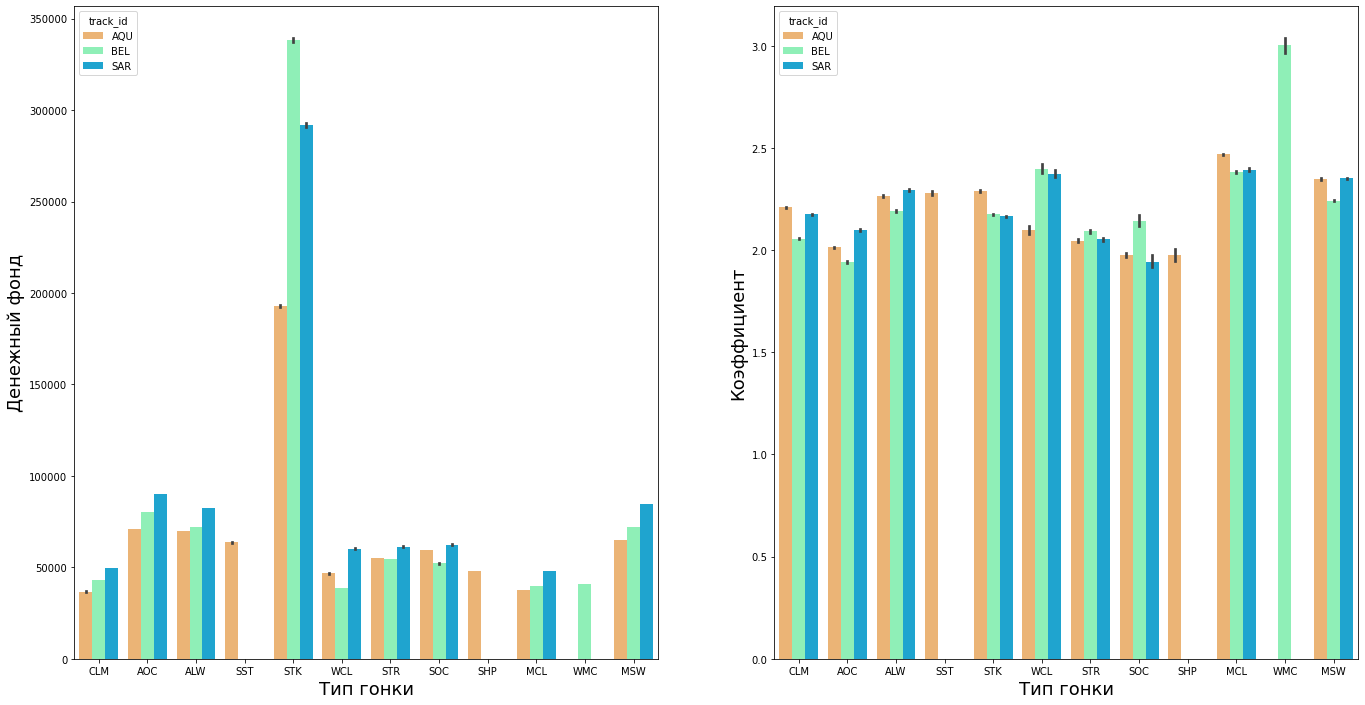

In [15]:
fig = plt.figure(figsize=(23,12));

ax1 = fig.add_subplot(121)  
sns.barplot (x="race_type", y = "purse", hue = "track_id", data=nyra_2019, palette='rainbow_r')
ax1.set_xlabel('Тип гонки', fontsize=18)
ax1.set_ylabel('Денежный фонд', fontsize=18)

ax2 = fig.add_subplot(122)  
sns.barplot (x="race_type", y = "odds_log", hue = "track_id", data=nyra_2019, palette='rainbow_r');
ax2.set_xlabel('Тип гонки', fontsize=18)
ax2.set_ylabel('Коэффициент', fontsize=18)

plt.show();

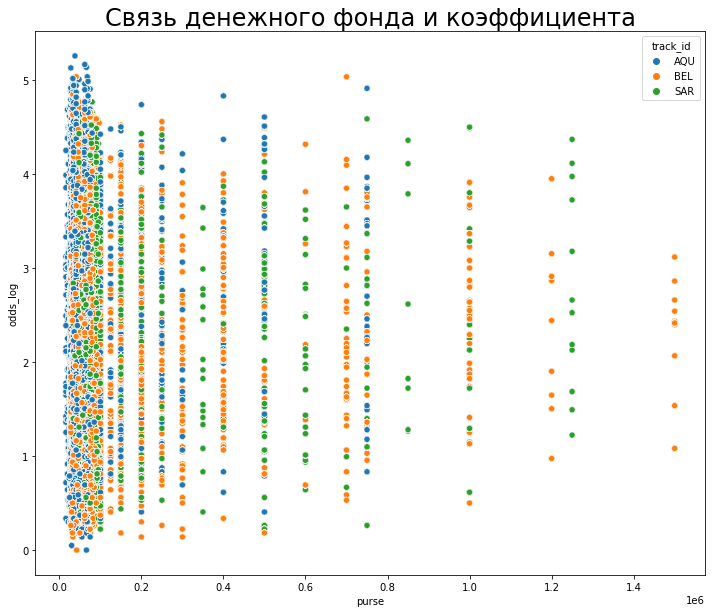

In [16]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x ='purse' ,y='odds_log',data = nyra_2019,hue = 'track_id')
plt.title("Связь денежного фонда и коэффициента", fontsize=24);
plt.show();

#### Вывод:
Получается, что чем выше коэффициент, тем меньше денег. То есть с маленьким коэффициентом в лошади больше уверенности на победу. По графику scatterplot видно, что больше денег на маленький коэффициент.
Больше всего денег на STK (скачки с наибольшим призовым фондом, в которых принимают участие самые лучшие лошади). Меньше всего на CLM, WCL, MCL, WMC (гонки лошадей после длительного перерыва, претендентов или новичков).

Признак race_type показывает какие гонки вообще бывают. При помощи boxplot можно посмотреть какой диапазон кэффициентов существует для каждого вида гонок.

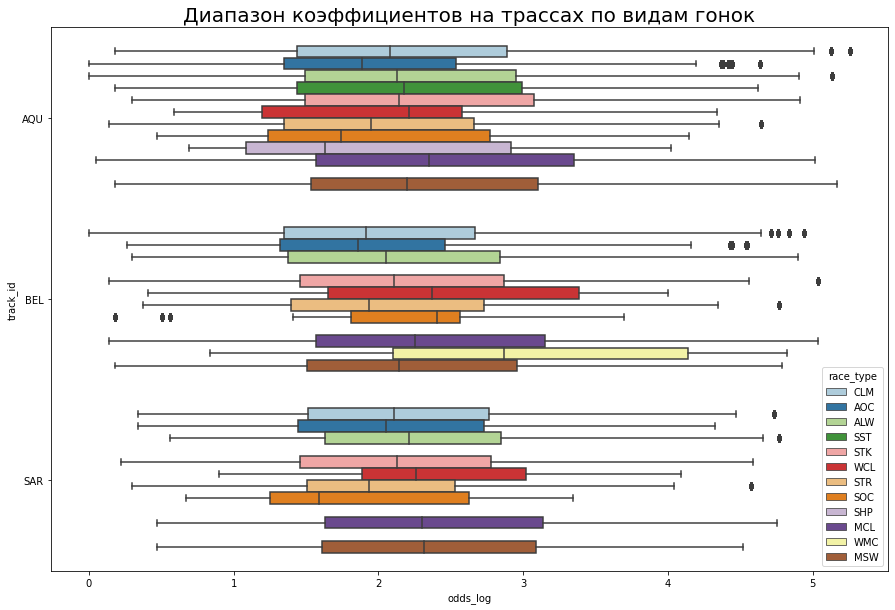

In [17]:
plt.figure(figsize=(15, 10))

sns.boxplot(x = "odds_log", y = "track_id", hue = "race_type",
            data = nyra_2019, palette='Paired')
plt.title("Диапазон коэффициентов на трассах по видам гонок",
          fontsize=20);

#### Вывод:
- на трассе AQU: пониже коэффициенты у видов: SHP, SOC, STR, AOC. повыше коэффициенты: CLM, ALW, SST, STK, WCL, MCL, MSW.
- на трассе BEL: пониже коэффициенты у видов: CLM, AOC, STR. повыше коэффициенты: ALW, STK, WCL, SOC, WMS, MSW.
- на трассе SAR: пониже коэффициенты у видов: STR, SOC. повыше коэффициенты: CLM, AOC, ALW, STK, WCL, MCL, MSW.

Можно посмотреть у какой лошади на какой трассе какие коэффициенты

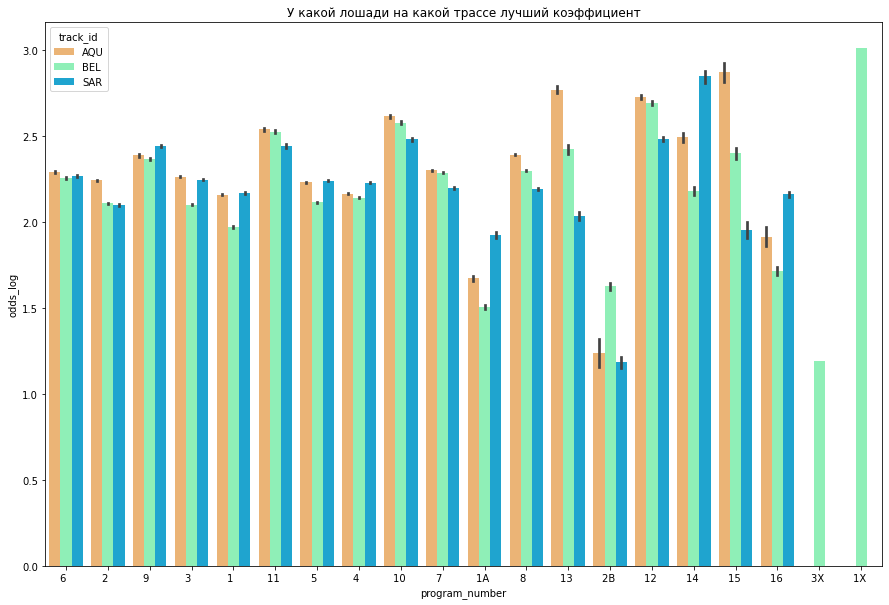

In [18]:
plt.figure(figsize=(15, 10));
plt.title('У какой лошади на какой трассе лучший коэффициент');
sns.barplot (x="program_number", y = "odds_log", 
             hue = "track_id", data=nyra_2019, palette='rainbow_r');

#### Вывод:

Хорошие коэффициенты у лошади 2B. У 3X тоже хороший коэффициент, но эта лошадь участвует только в забегах на трасса BEL.

У всех лошадей лучше коэффициенты на трассе SAR, кроме 14 номера. Хуже коэффициенты на трассе AQU. 

У 4 лошади, которая больше всех участвует, не самые лучшие коэффициенты.

### 2.2 Анализ признака "purse".

Можно посмотерть какой диапазон денежного фонда приходится на на каждую из трасс

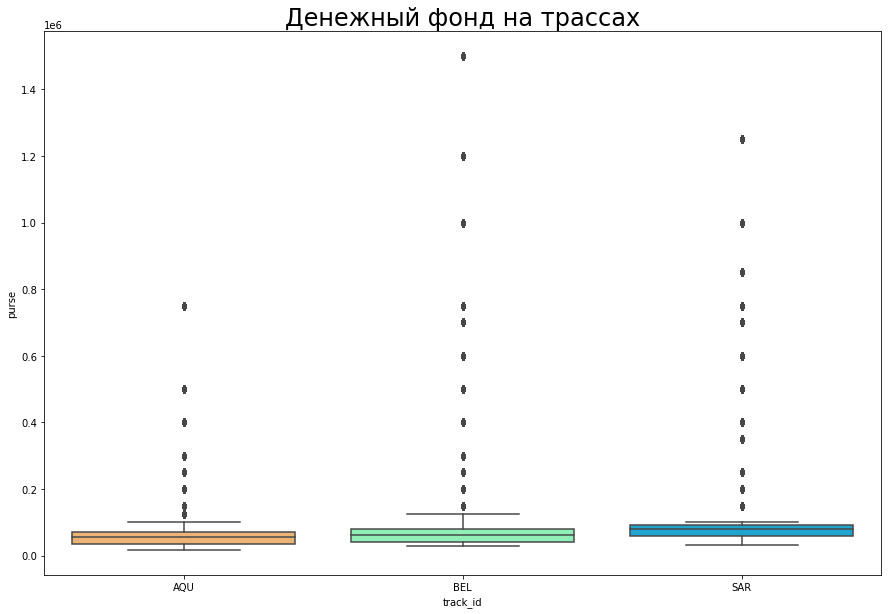

In [19]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="track_id", y = "purse", data=nyra_2019, palette='rainbow_r')
plt.title("Денежный фонд на трассах", fontsize=24);

#### Вывод:

Самый большой диапазон значений денежного фонда на трассе BEL. Но самый высокий доход у трассы SAR.

Также есть такой признак, как вес, который цепляют на лошадь во время скачек. Есть ли связь между деньгами и весом, который на лошади? Чем больше вес, тем больше ставки? И интересно посмотреть на какой трассе какой вес предпочтительнее

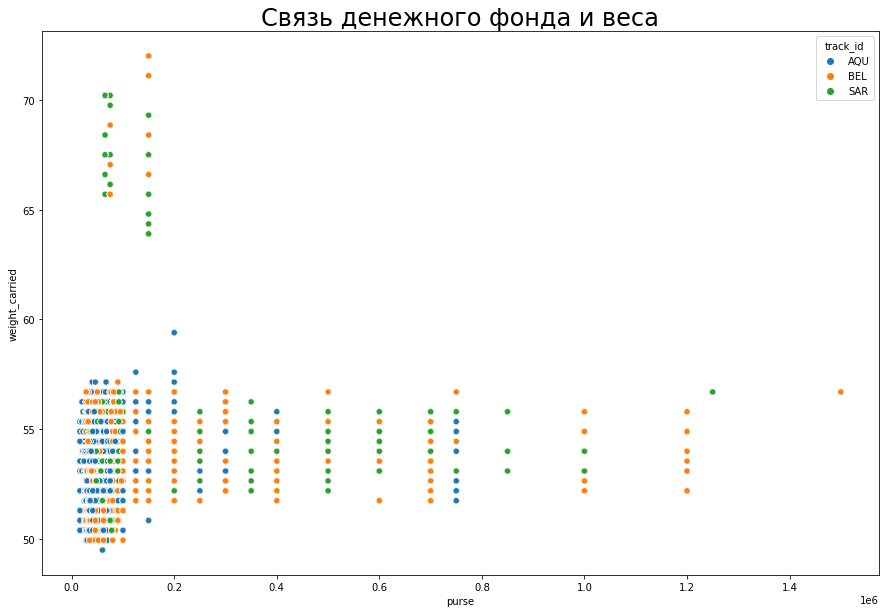

In [20]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x ='purse', y='weight_carried' ,data=nyra_2019, hue='track_id')
plt.title("Связь денежного фонда и веса", fontsize=24);

#### Вывод:

По графикам видно, что больший вес на трассе SAR и немного BEL.

Больше денежного фонда на трассах BEL и SAR, немного на AQU.

На трассе AQU в основном лошади с грузом до 60 кг. И у этой трассы не такой большой денежный фонд, как у остальных.

### 2.3 Анализ трасс и видов гонок

В каждой из главных трасс (AQU, BEL, SAR) есть следующие виды трасс, по которым происходят соревнования:

- M - барьер,
- D - грязь, 
- O - внешний газон, 
- I - внутренний газон, 
- T - газон.

Можно посмотреть какой процент этих трасс содержится в главных трассах. То есть какой вид преобладает на трассе, чтоб примерно понимать какой вид скачек может быть на них. 

In [21]:
# функция, которая группирует по признаку и считает процентное соотношение другого признака в нем
def barplot_group(col_main: str, col_group: str, title: str, rotation: int) -> None:

    plt.figure(figsize=(15, 10))

    data = (
        nyra_2019.groupby([col_group])[col_main]  # как группируем датасет
        .value_counts(normalize=True)  # нормировка
        .rename('percentage').mul(100).reset_index().sort_values(col_group)
    )  # сортировка значений

    ax = sns.barplot(x=col_main,
                     y="percentage",
                     hue=col_group,
                     data=data,
                     palette='Paired')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,  # текст
            (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
            ha='center',  # центрирование
            va='center',
            xytext=(0, 10),
            textcoords='offset points',  # точка смещения относительно координаты 
            rotation=rotation,
            fontsize=10)
  
    plt.title(title, fontsize=20)
    plt.ylabel('Percentage', fontsize=14)
    plt.xlabel(col_main, fontsize=14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

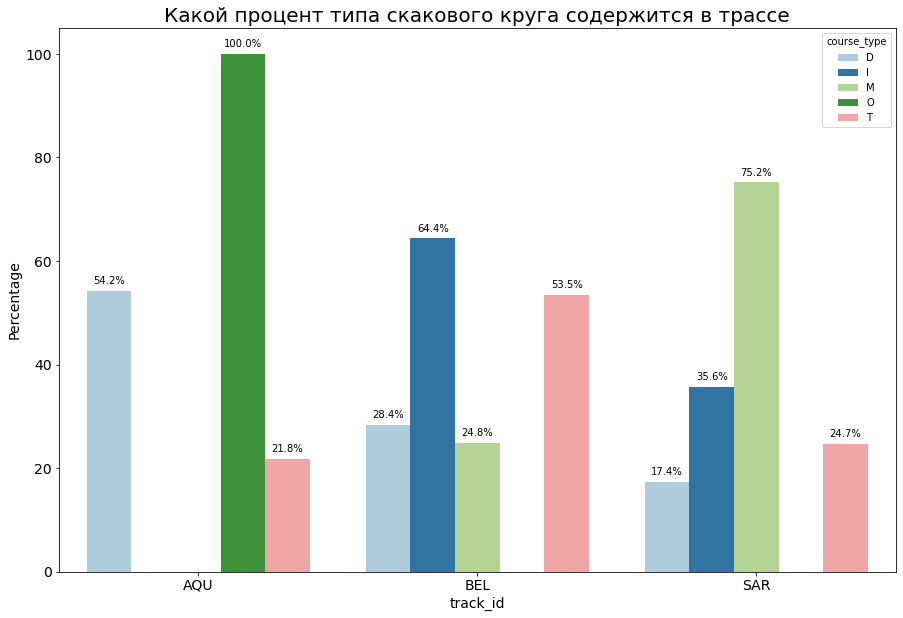

In [22]:
barplot_group('track_id', 'course_type',
              "Какой процент типа скакового круга содержится в трассе", 0)

#### Вывод:
- AQU (Авердук): это трасса с грязью (больше, чем у остальных), везде внешний газон и местами газон.
- BEL (Белмонт): это трасса с грязью , внутренним газоном (больше, чем у остальных), с небольшими препятствиями и газоном.
- SAR (Саратога): это трасса с грязью, внутренним газоном, с препятствиями (больше, чем у остальных) и газоном.

Можно сделать вывод, что трасса AQU предназначена просто для пробега на скорость на неоднородной (скользкой) поверхности. Трасса BEL почище, больше газона, но уже с небольшими препятствиями. Трасса SAR это уже трасса с преобладанием препятствий.

Имея такой признак, как 'track_condition' (состояние трассы), можно посмотерть на состояние трассы:
- YL - Уступчивая,
- FM - Жесткая,
- SY - Неаккуратная,
- GD - Хорошая,
- FT - Быстрая,
- MY - Грязная,
- SF - Тихая

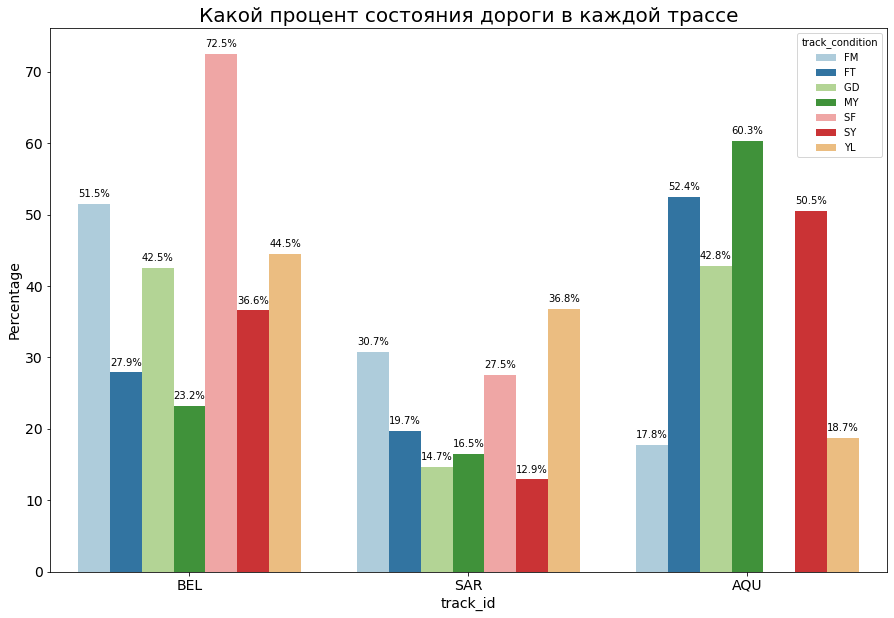

In [23]:
barplot_group('track_id', 'track_condition',
              "Какой процент состояния дороги в каждой трассе", 0)

#### Вывод:
- AQU (Авердук): трасса грязная, небрежная, прочная, хорошая. (больше грязи)
- BEL (Белмонт): трасса тихая, твердая, хорошая. (больше газона)
- SAR (Саратога): трасса хорошая, твердая, тихая.

По характеристикам получше трасса BEL (Белмонт), чем остальные.

Также можно проанализировать в каком состоянии тип трассы

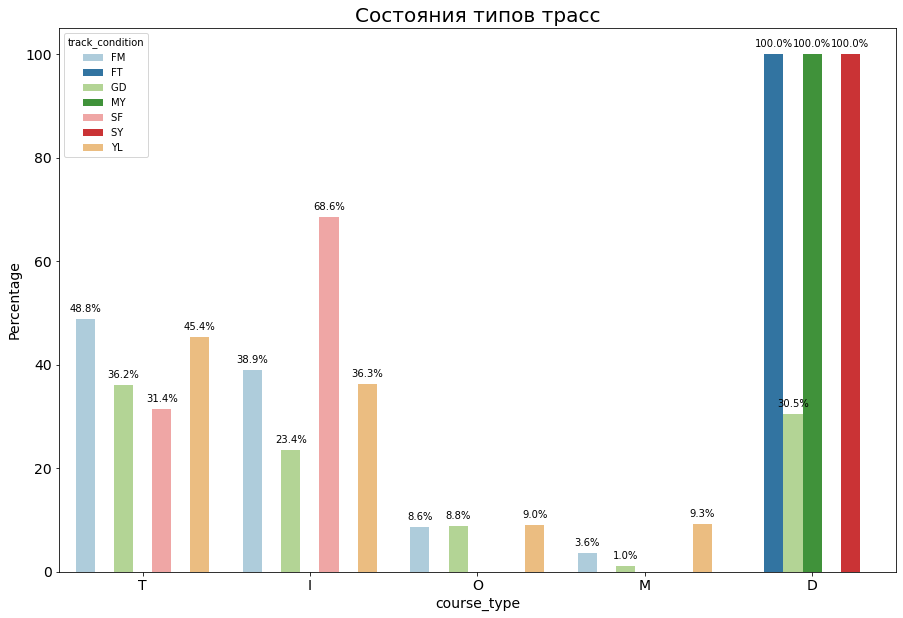

In [24]:
barplot_group('course_type', 'track_condition',
              "Состояния типов трасс", 0)

#### Вывод:

- T (газон): твердая, хорошая, тихая, уступчивая.
- I (внутренний газон): твердая, хорошая, самая тихая, уступчивая.
- O (внешний газон): неочень твердая, хорошая, уступчивая.
- M (препятствие): неочень твердая, неочень хорошая, уступчивая.
- D (грязь): самая прочная, хорошая, самая грязная, самая небрежная.

Далее можно посмотреть какие типы соревнований на каждой из трасс преобладают:

- STK — скачки с наибольшим призовым фондом, в которых принимают участие самые лучшие лошади.
- WCL — заявочная гонка, в которой одному или нескольким участникам разрешается участвовать в гонке без возможности быть заявленными после длительного перерыва, и они участвуют в заявочной гонке, заявочная цена которой равна или превышает их последний старт в заявочной гонке.
- WMC — Заявочная гонка для не победителей, в которой одному или нескольким участникам разрешается участвовать в гонке без возможности быть заявленными после длительного перерыва, и они участвуют в заявочной гонке, заявочная цена которой равна или превышает их последний старт в заявочной гонке.
- SST — В этом забеге по ставкам участвуют только лошади, которые стартовали за определенную заявленную цену или меньше в течение определенного периода времени.
- SHP — Эта категория зарезервирована для лошадей, которые выступали в низшей заявочной компании, но улучшились до такой степени, что они не рискуют быть проданными в заявочной гонке. По сути, этот забег является забегом, допускаемым только к лошадям, которые ранее участвовали в заявочном забеге на определенном уровне (например, стартеры по заявочной цене в 5000 долларов). В стартовой гонке с гандикапом лошади взвешиваются так же, как и в гонке с гандикапом. (Гандикап — в многоэтапных спортивных соревнованиях — способ отражения лидерства на предыдущих этапах в более раннем выпуске на старт в последующих. А также, способ уравнивания возможностей слабых участников соревнования с более сильными путём предоставления им некоего преимущества.)
- CLM — Забеги претендентов - это наиболее часто проводимые забеги в стране. Лошади, участвующие в заявочных забегах, предлагаются для продажи по определенной цене подходящим покупателям.
- STR — Стартовые заезды с надбавкой идентичны стартовым заездам с гандикапом, с той лишь разницей, что лошади, участвующие в этом заезде, взвешиваются с учетом условий надбавки (т.е. количества заездов или выигранных денег).
- AOC — Этот тип гонок сочетает в себе черты, присущие двум традиционным типам гонок - гоночным и заявочным. Лошади могут быть заявлены на условиях допуска (не имеют права быть заявленными, но должны соответствовать условиям гонки) или заявлены по заявленной цене, если они не соответствуют условиям гонки.,
- SOC — Этот тип гонок представляет собой еще один гибрид двух типов гонок: Стартового пособия и Заявочного. Чтобы участвовать в забеге в качестве “разрешенной лошади” (не подлежащей заявке), лошадь должна стартовать за указанную заявленную цену или меньше в установленные сроки. Лошади, не подпадающие под условия Стартового пособия, могут участвовать в забеге, но они должны конкурировать за заявленную цену.
- MCL — первые заявочные забеги предназначены для лошадей, которые никогда не выигрывали забег и имеют право быть заявленными.
- ALW - скачки, для которых судья скачек разрабатывает определенные условия для определения веса, который необходимо перевозить, в зависимости от возраста, пола и / или прошлых результатов лошади.
- MSW - Первый Специальный Вес. Эти скачки предназначены для лошадей, которые никогда не выигрывали скачки. Они не имеют права быть востребованными. Термин "специальный вес" происходит от того факта, что произвольные веса присваиваются лошадям по возрасту. (например, 3-летние 118 фунтов, старше 122 фунтов).

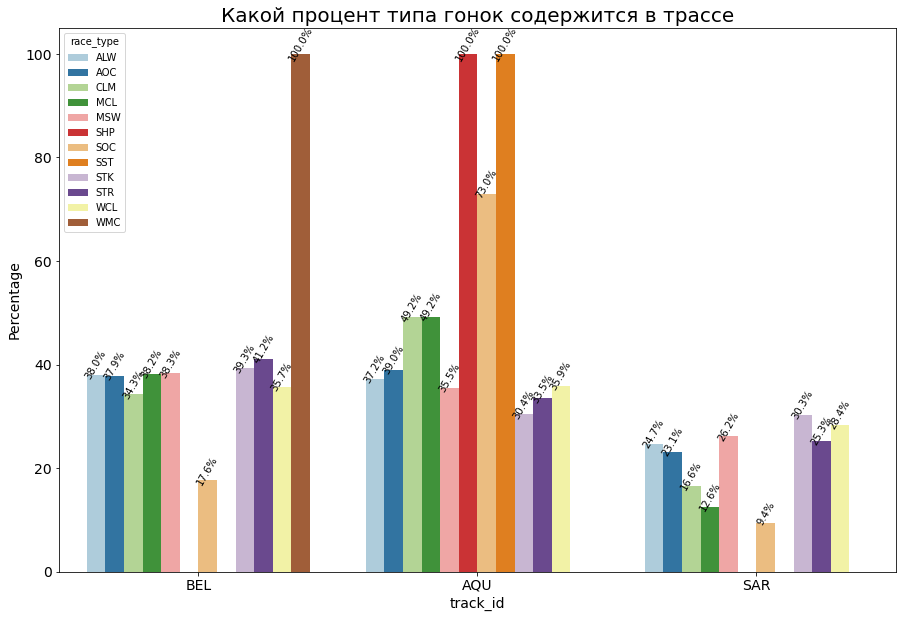

In [25]:
barplot_group('track_id', 'race_type',
              "Какой процент типа гонок содержится в трассе", 60)

#### Вывод:
- Трасса BEL: Всегда проводят соревнования для непобедителей (WMC), меньше всего соревнований типа SOC (гибридный забег по стартовому и заявленному пособию). 30-40% проводятся забеги типов ALW, AOC, CLM, MCL, MSW, STK, STR, WCL.
- Трасса AQU: На этой трассе проводится больше всех типов соревнований. Всегда проводятся соревнования SHP (забег с лошадьми, которые улучшили свои показания), SST (лошади, которые выступают по заявленной цене). Большая доля соревнований типа SOC (гибридный забег по стартовому я заявленному пособию). 30-40% проводятся забеги типов ALW, AOC, CLM, MCL, MSW, STK, STR, WCL.
- Трасса SAR: На этой трассе проводится меньше всего типов соревнований. Большинство соревнований типа STK (наибольший призовой фонд). Меньше всего соревнований типа SOC. 20-30% проводятся соревнования типов ALW, STR, AOC, MSW, WCL.

Соревнования типов ALW, AOC, MSW, STR, WCL проводятся на всех трассах. 

Можно сказать, что на трассе SAR проводятся соревнования с более опытными лошадьми. На ней также больше всего препятствий.

Также можно посмотерть какие дистанциии преобладают на каждой из трасс

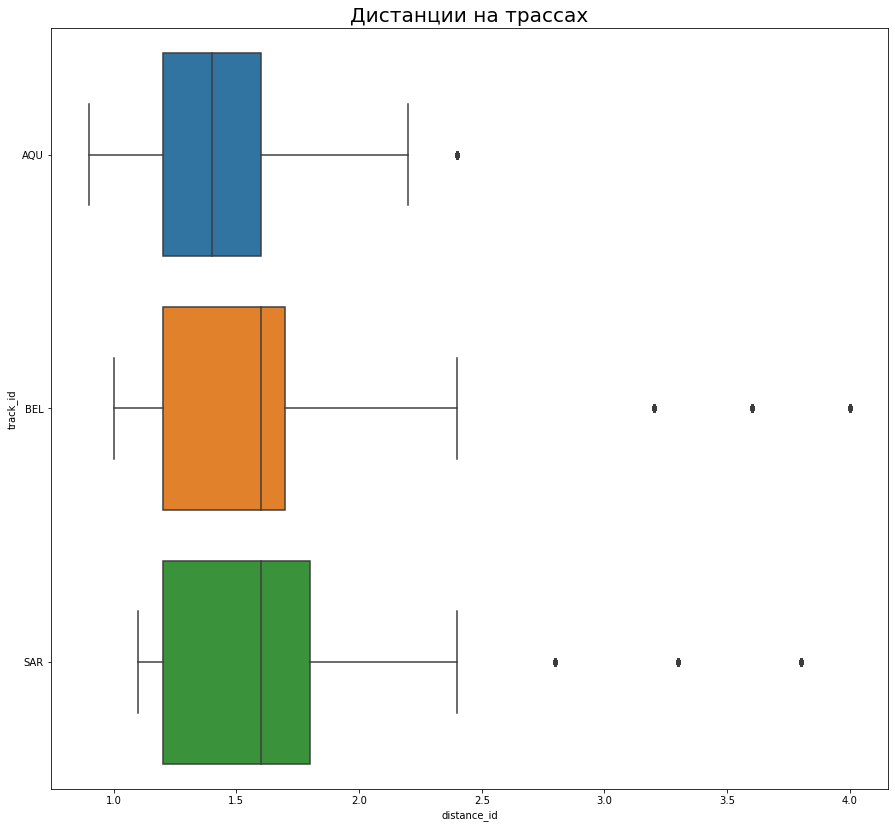

In [26]:
plt.figure(figsize=(15, 14))
sns.boxplot(data=nyra_2019, x='distance_id', y='track_id')
plt.title('Дистанции на трассах', fontsize=20);

#### Вывод:

Самые длинные дистанции на трассах BEL и SAR.

Самый большой диапазон дистанций на трассе BEL.

На трассе AQU самые короткие дистанции.


### 2.4 Анализ лошадей

Хотелось бы знать на каких дистанциях и на каких трассах лошади принимали участия

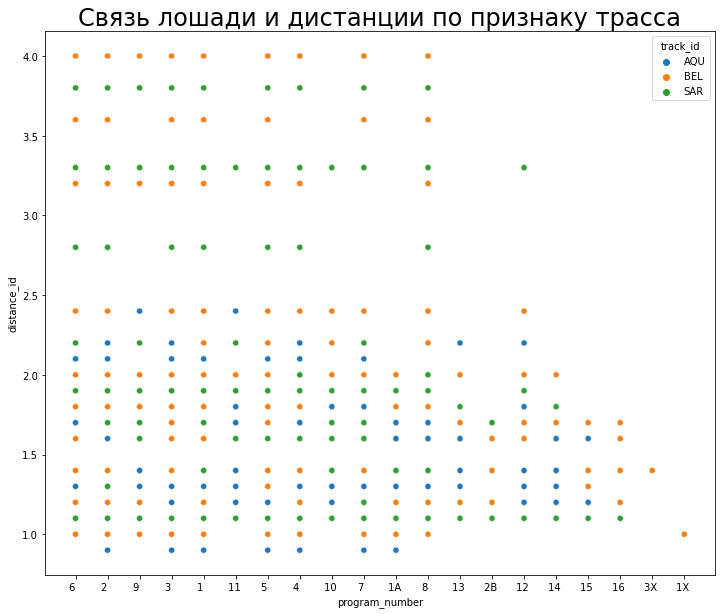

In [27]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x ='program_number' ,y='distance_id',data = nyra_2019, hue = 'track_id')
plt.title("Связь лошади и дистанции по признаку трасса", fontsize=24);
plt.show();

#### Вывод: 

По полученному графику можно выявить, что 1X, 3X 16, 2B - совсем новички. 1X принимал участие, видимо, в первый раз на небольшой дистанции. Можно сделать вывод, что 1X самый молодой участник.

На больших дистанциях на трассах BEL и SAR принимают участие лошади 6, 2, 9, 3, 1, 5, 4, 7, 8. Можно сделать вывод, что они самые взрослые.

Также на больших дистанциях только в SAR принимали участие лошади 11 и 12. Остальные принимали участие в дистанциях до 2,5 км.

### 2.5 Перемещения лошадей на трассах во время соревнований

Перемещение лошадей лучше смотреть по признаку course_type, то есть как двигались лошади по газонам, грязи и трассе с прерятствиями

In [31]:
# для удобства создадим словарь с цветами трасс

color_track = {
    'D': 'black',  # грязь
    'I': 'darkolivegreen',  # внутренний газон
    'O': 'palegreen',  # внешний газон
    'T': 'green',  # газон
    'M': 'red' # препятсвтвие
}  

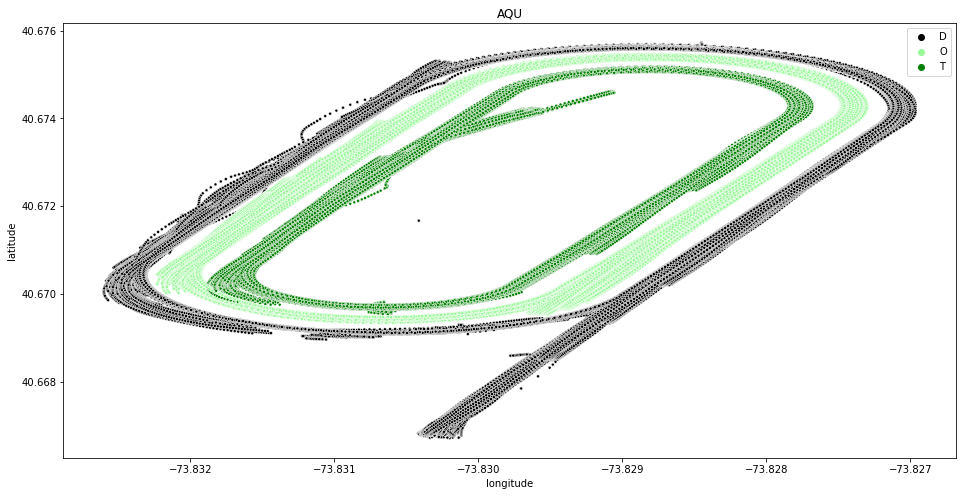

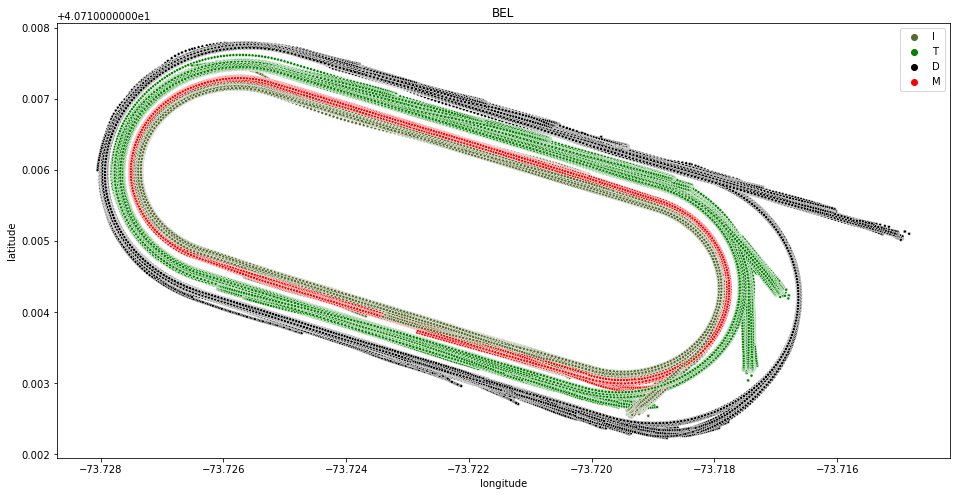

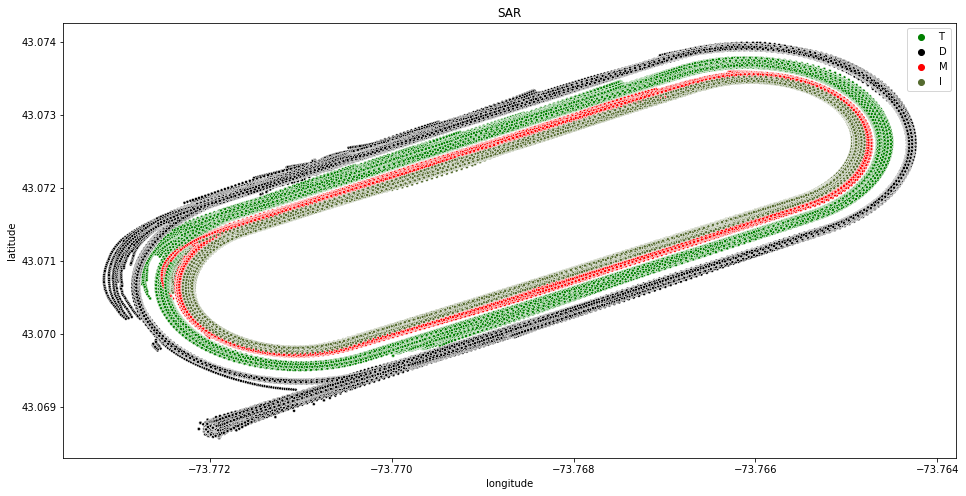

In [33]:
# зная ширину и долготу можно построить графики
for track in ['AQU', 'BEL', 'SAR']:
    plt.figure(figsize = (16, 8))

    sns.scatterplot(data = nyra_2019[(nyra_2019.track_id == track)],
                    x = "longitude",
                    y = "latitude", 
                    hue = "course_type", 
                    marker='.',
                    palette = color_track)

    plt.title(track) # название главной трассы
    plt.legend() #  легенда с видом трассы

    plt.show()

#### Вывод:
По графикам видно как расположены круги, по которым бежали лошади. И как на трассах расположены типы кругов скачек.

Видно, что сложнее даются такие виды трасс, как D (грязь) и T (газон). Особенно на поворотах просмаривается, что немного "заносит". 

Более четкий путь на трассе I (внутренний газон) и M (препятствие). Но на препятствиях также иногда на повортах "заносит".

## 3. Feature engineering

Для дальнейшей работы с данными, а имеено с моделированием, следует создать еще некоторые признаки, которые помогут для улучшения показателей модели

- Преобразование признака 'post_time'

In [15]:
# так как признак дан в формате int
# Для дальнейших преобразований его следует 
# преобразовать в формат str
nyra_2019['post_time'] = nyra_2019['post_time'].astype(str)

In [16]:
# функция для переводв столбца post_time 
# в формат datetime64[ns]

def post_time_preobr(data: str, minutes: int) -> None:
    """
    data: str - преобразованный столбец в str
    minutes: int - две последние цифры-это минуты
    Соответственно, берется от 0 элемента до минут,
    ставится ":" и добавляются минуты
    """
    if isinstance (data, (str)):
        return data[0:minutes] + ':' + data[minutes:]

In [17]:
# применение к столбцу 'post_time'
nyra_2019['post_time_new'] = nyra_2019['post_time'].apply(lambda x: post_time_preobr(x, -2))

# преобразование в формат datetime
nyra_2019['post_time_new'] = nyra_2019['post_time_new'].astype('datetime64[ns]')
# часы
nyra_2019['hours'] = pd.to_datetime(nyra_2019['post_time_new']).dt.hour
# минуты
nyra_2019['minutes'] = pd.to_datetime(nyra_2019['post_time_new']).dt.minute

- Создание признака "сезоны", используя месяцы из "race_date"

In [18]:
def seasons(data: int) -> object:
    """
    Формирование признака сезоны
    """
    if isinstance(data, (int)):
        if data == 1 & data == 2 & data == 12:
             return 'Зима'
        elif data == 3 & data == 4 & data == 5:
            return 'Весна'
        elif data == 6 & data == 7 & data == 8:
            return 'Лето'
        else: return 'Осень'

In [19]:
# применение к столбцу "month"
nyra_2019['season'] = nyra_2019.month.apply(lambda x: seasons(x))

Создание признака "time_of_day", используя часы из "post_time"

In [20]:
def time_day(data: int) -> object:
    """
    Формирование признака время дня
    """
    if isinstance(data, (int)):
        if data == 11:
             return 'Утро'
        elif (1 <= data <= 4) or (data == 12):
            return 'День'
        elif 5 <= data <= 8:
            return 'Вечер'

In [21]:
# применение к столбцу "hours"
nyra_2019['time_of_day'] = nyra_2019.hours.apply(lambda x: time_day(x))

- Создание признака "name_of_day", используя признак "day_of_week"

In [22]:
# список значений в признаке day_of_week
lst_week = (0, 1, 2, 3, 4, 5, 6)

# список значений, на которые надо поменять day_of_week
lst_week_new = ('Воскресенье', 'Понедельник', 'Вторник',
                'Среда', 'Четверг', 'Пятница', 'Суббота')

In [23]:
# замена методом replace
nyra_2019['name_of_day'] = nyra_2019['day_of_week'].replace(lst_week, lst_week_new) # заменяем

In [24]:
nyra_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 28 columns):
 #   Column           Dtype         
---  ------           -----         
 0   track_id         object        
 1   race_number      int64         
 2   program_number   object        
 3   trakus_index     int64         
 4   latitude         float64       
 5   longitude        float64       
 6   distance_id      float64       
 7   course_type      object        
 8   track_condition  object        
 9   run_up_distance  float64       
 10  race_type        object        
 11  purse            int64         
 12  post_time        object        
 13  weight_carried   float64       
 14  jockey           object        
 15  odds             int64         
 16  odds_new         float64       
 17  year             int64         
 18  month            int64         
 19  day              int64         
 20  day_of_week      int64         
 21  odds_log         float64       

Можно удалить следующие признаки:

- year, так как везде 2019 год;
- odds, так как далее надо рассматривать odds_new и odds_log;
- post_time и post_time_new, эти признаки тоже преобразованы;
- minutes, сильно они не пригодятся;
- hours, так как они преобразованы.

In [25]:
# удаление признаков
nyra_2019.drop(columns=['odds', 'post_time', 
                        'post_time_new', 'year',
                       'minutes', 'hours'], axis=1, inplace=True)

In [26]:
nyra_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 22 columns):
 #   Column           Dtype  
---  ------           -----  
 0   track_id         object 
 1   race_number      int64  
 2   program_number   object 
 3   trakus_index     int64  
 4   latitude         float64
 5   longitude        float64
 6   distance_id      float64
 7   course_type      object 
 8   track_condition  object 
 9   run_up_distance  float64
 10  race_type        object 
 11  purse            int64  
 12  weight_carried   float64
 13  jockey           object 
 14  odds_new         float64
 15  month            int64  
 16  day              int64  
 17  day_of_week      int64  
 18  odds_log         float64
 19  season           object 
 20  time_of_day      object 
 21  name_of_day      object 
dtypes: float64(7), int64(6), object(9)
memory usage: 877.6+ MB


Преобразованный датасет следует сохранить для дальнейшей работы и моделирования

In [53]:
nyra_2019_mod = nyra_2019.to_csv("nyra_2019_mod.csv", index=False)